In [10]:
print('\nGrovers Algorithm')
print('------------------\n')

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
import math
from math import pi

#IBMQ.enable_account('Enter API token')
#provider = IBMQ.get_provider(hub='ibm-q')


Grovers Algorithm
------------------



We willen zoeken op 0000. Met andere woorden

In [11]:
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

We passen een Hadamard Gate toe op elke qubit via volgend commando, rechtstreeks op het circuit:

In [12]:
qc.h(q)

Nu maken we de Oracle Function:

In [ ]:
print('\Maak Oracle circuit....\n')

### 0000 Oracle ###

#0000 wordt omgezet in 1111
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

#triple controlled Z gate
#dit is een truuk, waardoor enkel 1111 overeind gaat blijven
qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])

#terugzetten naar originele staat
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

Alternatief oracle indien je 1100 wil zoeken.

In [13]:

### 1100 Oracle ###
# het verschil zit hem dat we nu enkel de 3e en 4de qubit naar 1 staat willen omkeren.

qc.x(q[0])
qc.x(q[1])

#dit is een truuk, waardoor enkel 1111 overeind gaat blijven
qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])


Amplificatie circuit:

In [14]:
print('\nMaak Amplification circuit....\n')
#Hadamard
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

#Not
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

#ongedaan maken shrinkdown
qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])


Maak Amplification circuit....



In [15]:
### Meting ###
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

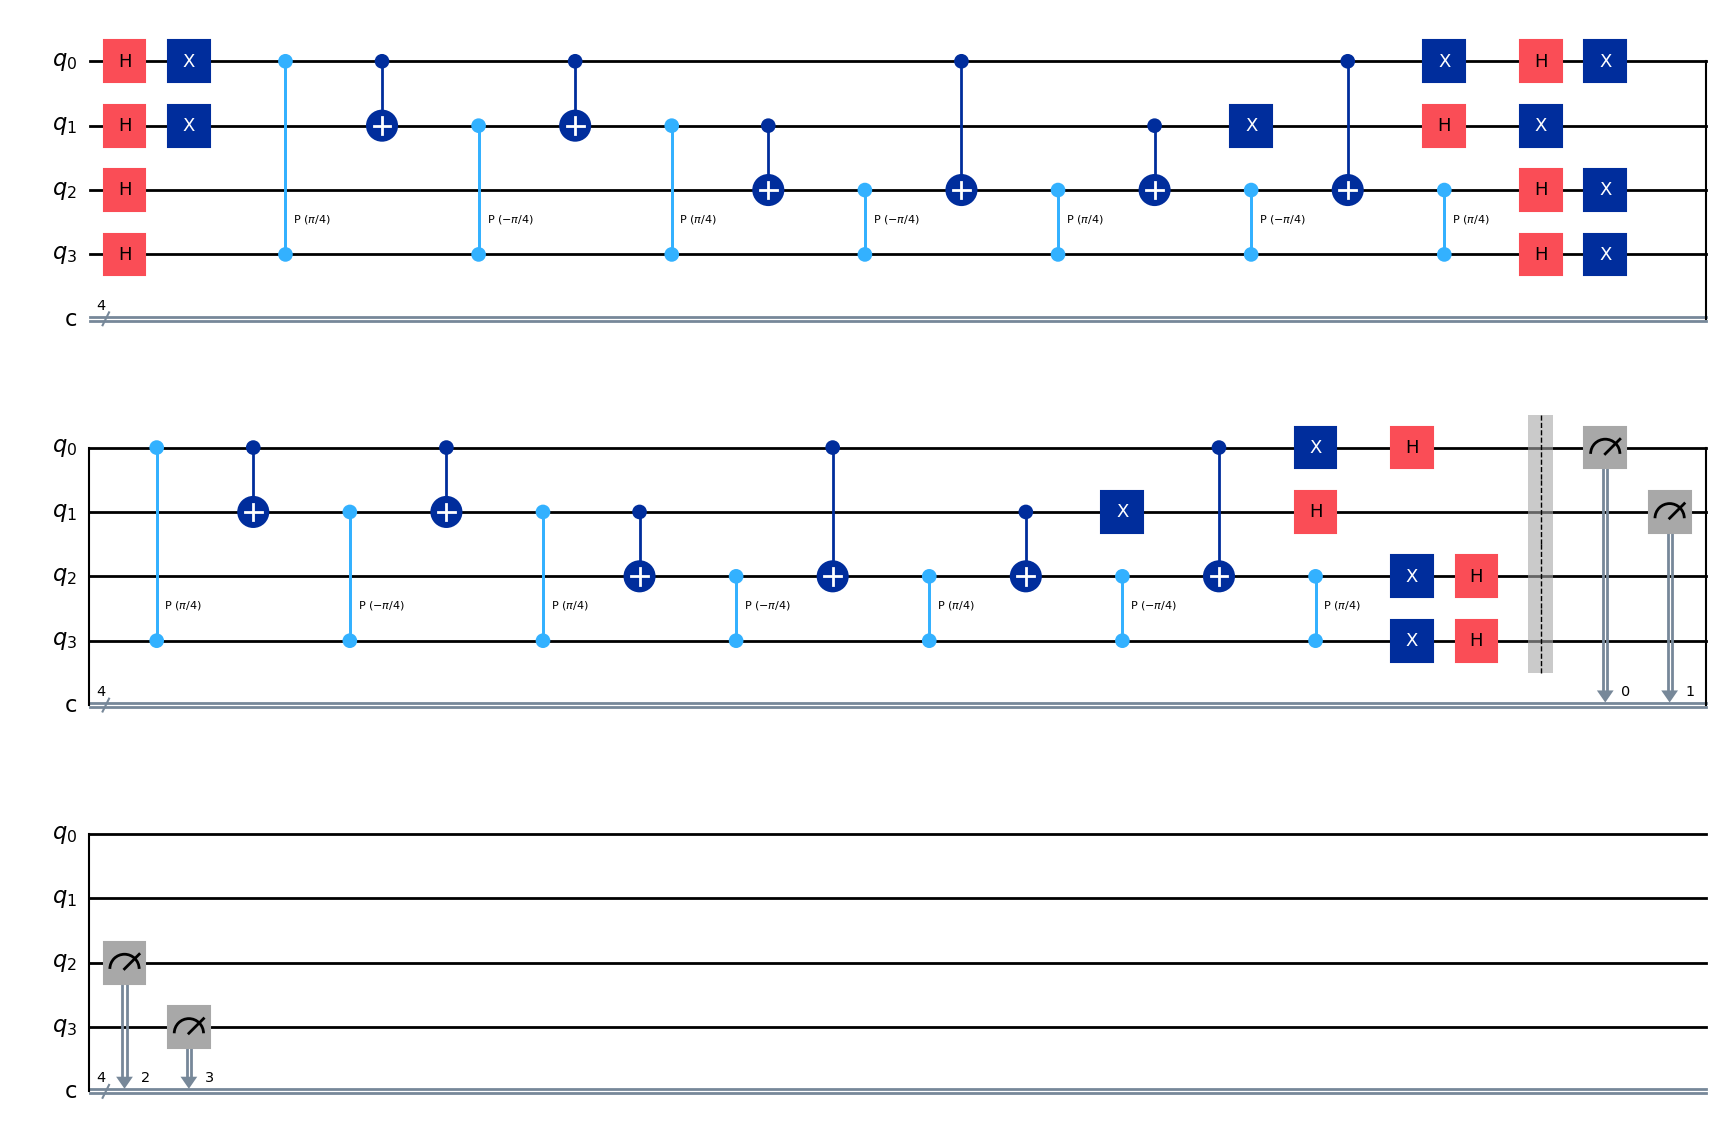

In [16]:
qc.draw('mpl')

In [17]:
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

ModuleNotFoundError: No module named 'qiskit.providers.aer'

In [18]:
backend = Aer.get_backend('qasm_simulator')

simulator = Aer.get_backend('qasm_simulator')
transpiled_program = transpile(qc, simulator)
job = simulator.run(transpiled_program, shots=1000)
counts = job.result().get_counts()


print('RESULT: ',counts,'\n')

RESULT:  {'1011': 29, '1100': 487, '1111': 39, '0001': 43, '0100': 32, '1101': 42, '1000': 32, '0110': 33, '1110': 33, '1001': 35, '0101': 37, '0010': 34, '0000': 27, '0111': 34, '0011': 34, '1010': 29} 



## Histogram

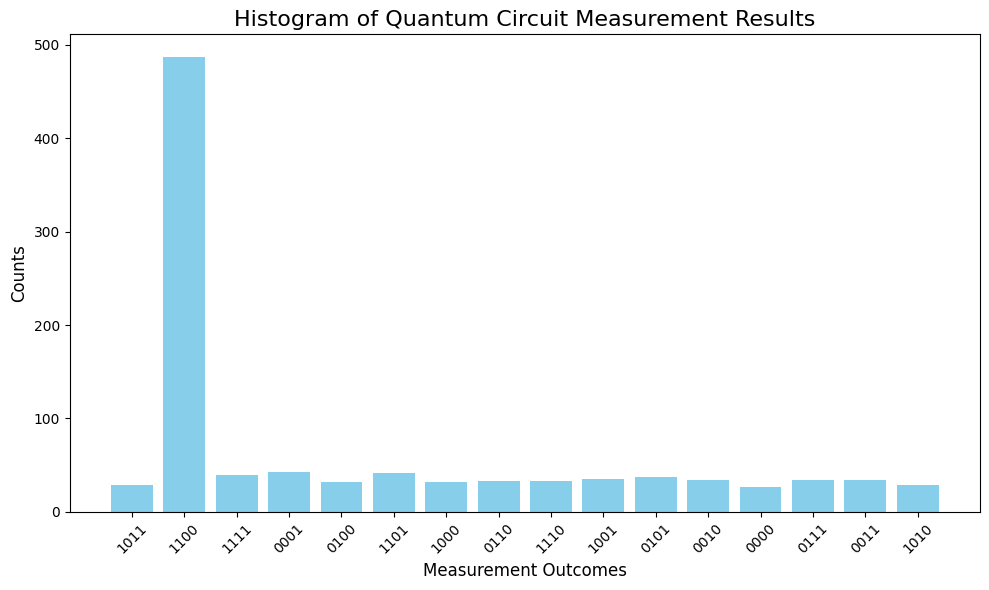

In [19]:
import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')

# Add titles and labels
plt.title('Histogram of Quantum Circuit Measurement Results', fontsize=16)
plt.xlabel('Measurement Outcomes', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the histogram
plt.show()


Meer details zie https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb